In [10]:
def map_clusterings(adata, cluster_from, cluster_to):
    original_clusters = np.array(adata.obs[cluster_from].cat.categories)
    merged_clusters = np.array(adata.obs[cluster_to].cat.categories)
    overlap = np.zeros((len(original_clusters), len(merged_clusters)))
    for i, original in enumerate(tqdm(original_clusters)):
        for j, merged in enumerate(merged_clusters):
            original_ids = adata.obs.index[adata.obs[cluster_from] == original]
            merged_ids = adata.obs.index[adata.obs[cluster_to] == merged]
            overlap[i][j] = len(np.intersect1d(original_ids, merged_ids)) / len(original_ids)
    overlap = pd.DataFrame(overlap, index=original_clusters, columns=merged_clusters)
    return overlap

In [16]:
sc.tl.leiden(adata, resolution=5, key_added="leiden5")

In [22]:
sc.tl.leiden(adata, resolution=2, key_added="leiden2")

In [31]:
overlap = map_clusterings(adata, "louvain", "leiden")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 209.70it/s]


<Axes: >

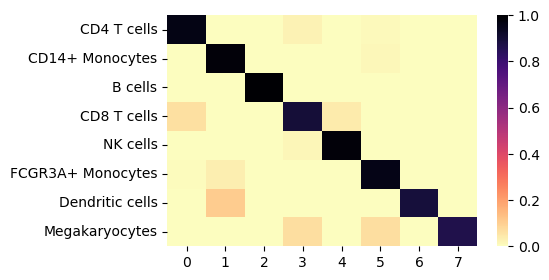

In [33]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(overlap, cmap="magma_r", ax=ax)